In [2]:
%matplotlib inline
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim

In [3]:
t_c = torch.tensor([0.5, 14.0, 15.0, 28.0, 11.0,
                    8.0, 3.0, -4.0, 6.0, 13.0, 21.0])
t_u = torch.tensor([35.7, 55.9, 58.2, 81.9, 56.3, 48.9,
                    33.9, 21.8, 48.4, 60.4, 68.4])
t_un = 0.1 * t_u

w2 = torch.ones(())
w1 = torch.ones(())
b = torch.zeros(())

In [4]:
def model_nonlin(t_u, w2, w1, b):
    return w2 * t_u ** 2  + w1 * t_u + b
def dmodel_dw2(t_u, w2, w1, b):
    return t_u**2
def dmodel_dw1(t_u, w2, w1, b):
    return t_u;
def dmodel_db_nonlin(t_u, w2, w1, b):
    return 1.0
def loss_fn(t_p, t_c):
    squared_diffs = (t_p - t_c)**2
    return squared_diffs.mean()
def dloss_fn(t_p, t_c):
    dsq_diffs=2* (t_p - t_c) / t_p.size(0)
    return dsq_diffs

def grad_fn_nonlin(t_u, t_c, t_p, w2, w1, b):
    dloss_dtp = dloss_fn(t_p, t_c)
    dloss_dw2 = dloss_dtp * dmodel_dw2(t_u, w2, w1, b)
    dloss_dw1 = dloss_dtp * dmodel_dw1(t_u, w2, w1, b)
    dloss_db = dloss_dtp * dmodel_db_nonlin(t_u, w2, w1, b)
    return torch.stack([dloss_dw2.sum(), dloss_dw1.sum(), dloss_db.sum()])

In [5]:
def training_loop_nonlin(n_epochs, learning_rate, params, t_u, t_c):
    for epoch in range(1, n_epochs + 1):
        w2, w1, b = params
        t_p = model_nonlin(t_u, w2, w1, b) 
        l = loss_fn(t_p, t_c)
        
        grad = grad_fn_nonlin(t_u, t_c, t_p, w2, w1, b)
        params = params - learning_rate * grad

        if epoch % 500 == 0:
            print('Epoch %d, Loss %f' % (epoch, float(l)))
            
    return params

Training for the following learning rate: 0.01
Epoch 500, Loss nan
Epoch 1000, Loss nan
Epoch 1500, Loss nan
Epoch 2000, Loss nan
Epoch 2500, Loss nan
Epoch 3000, Loss nan
Epoch 3500, Loss nan
Epoch 4000, Loss nan
Epoch 4500, Loss nan
Epoch 5000, Loss nan

Training for the following learning rate: 0.001
Epoch 500, Loss nan
Epoch 1000, Loss nan
Epoch 1500, Loss nan
Epoch 2000, Loss nan
Epoch 2500, Loss nan
Epoch 3000, Loss nan
Epoch 3500, Loss nan
Epoch 4000, Loss nan
Epoch 4500, Loss nan
Epoch 5000, Loss nan

Training for the following learning rate: 0.0001
Epoch 500, Loss 10.708597
Epoch 1000, Loss 8.642083
Epoch 1500, Loss 7.171005
Epoch 2000, Loss 6.123476
Epoch 2500, Loss 5.377228
Epoch 3000, Loss 4.845286
Epoch 3500, Loss 4.465787
Epoch 4000, Loss 4.194724
Epoch 4500, Loss 4.000802
Epoch 5000, Loss 3.861744

Training for the following learning rate: 1e-05
Epoch 500, Loss 13.269526
Epoch 1000, Loss 12.944256
Epoch 1500, Loss 12.629864
Epoch 2000, Loss 12.325988
Epoch 2500, Loss 12.

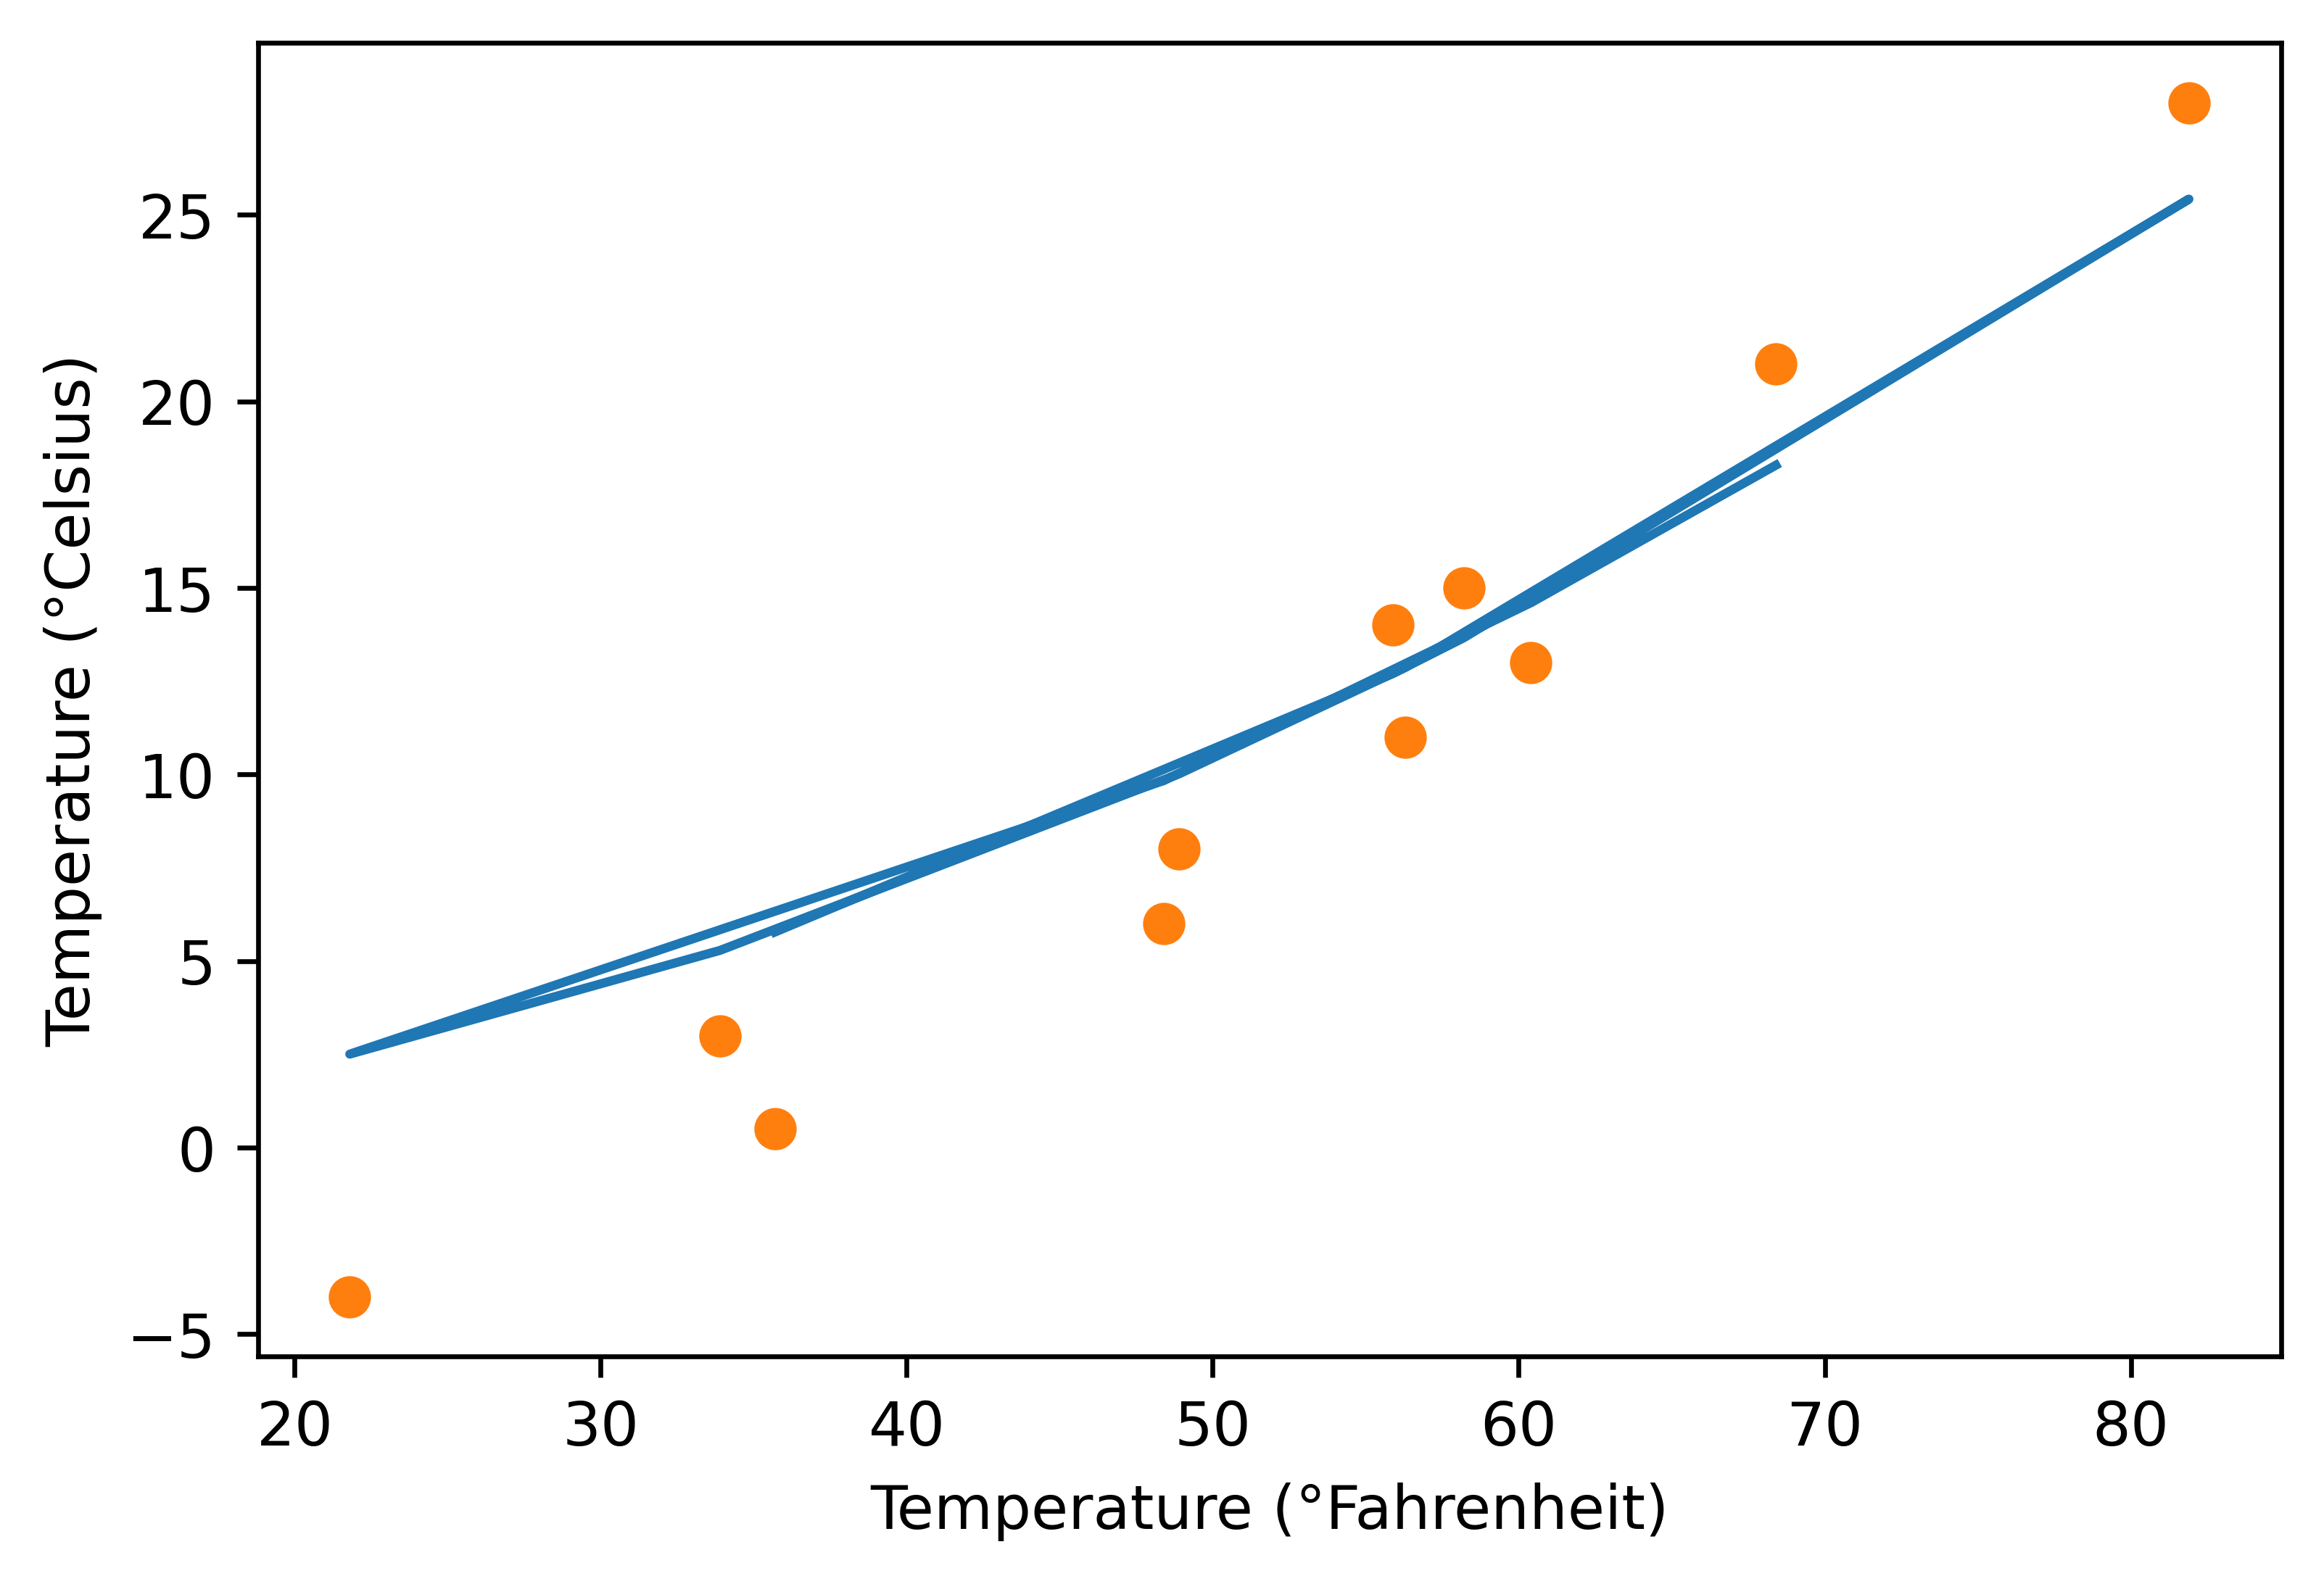

In [6]:
rate = [1e-2, 1e-3, 1e-4, 1e-5]

for learning_rate in rate:
    print("Training for the following learning rate:", learning_rate)
    params = torch.tensor([1.0, 1.0, 0.0])
    params = training_loop_nonlin(
        n_epochs = 5000, 
        learning_rate = learning_rate,
        params = params, 
        t_u = t_un,
        t_c = t_c)
    params
    %matplotlib inline
    from matplotlib import pyplot as plt
    t_p = model_nonlin(t_un, *params) 
    fig = plt.figure(dpi=600)
    plt.xlabel("Temperature (°Fahrenheit)")
    plt.ylabel("Temperature (°Celsius)")
    plt.plot(t_u.numpy(), t_p.detach().numpy()) 
    plt.plot(t_u.numpy(), t_c.numpy(), 'o')
    print("")

In [7]:
params = torch.tensor([1.0, 1.0, 0.0])
learning_rate = 1e-4

params = training_loop_nonlin(
    n_epochs = 5000, 
    learning_rate = learning_rate,
    params = params, 
    t_u = t_un,
    t_c = t_c)
params

Epoch 500, Loss 10.708597
Epoch 1000, Loss 8.642083
Epoch 1500, Loss 7.171005
Epoch 2000, Loss 6.123476
Epoch 2500, Loss 5.377228
Epoch 3000, Loss 4.845286
Epoch 3500, Loss 4.465787
Epoch 4000, Loss 4.194724
Epoch 4500, Loss 4.000802
Epoch 5000, Loss 3.861744


tensor([ 0.5570, -0.8881, -0.8753])

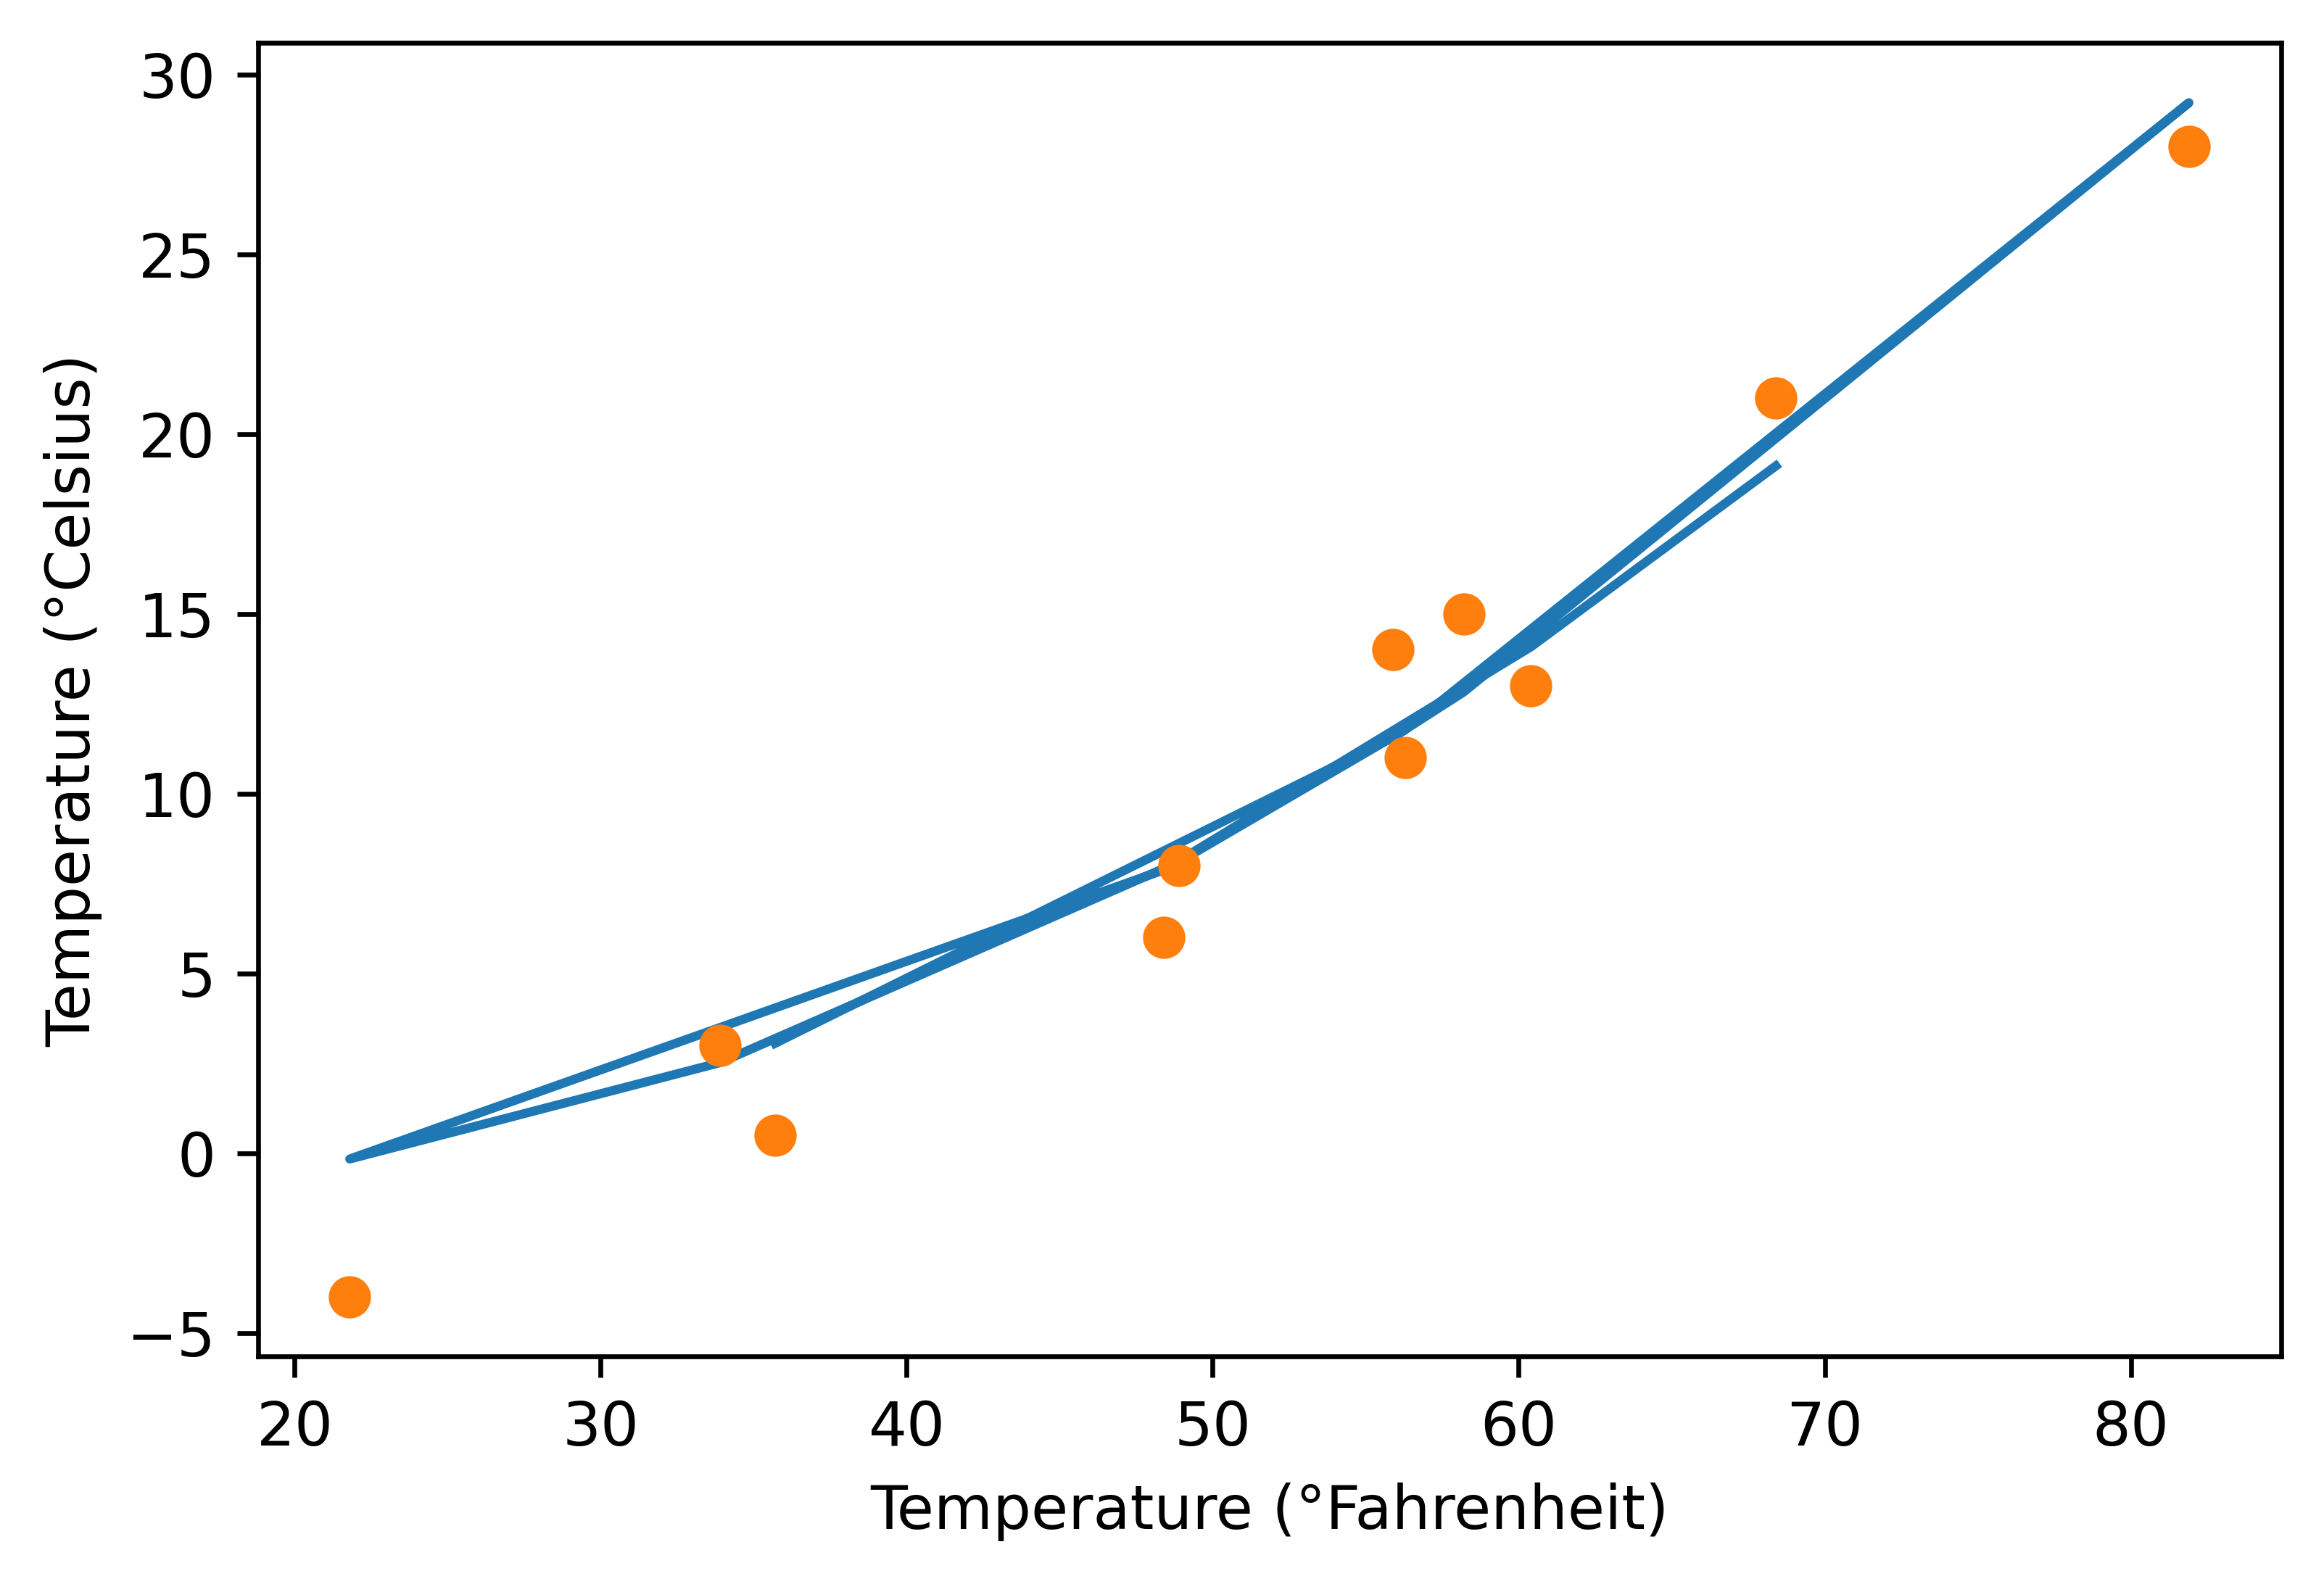

In [8]:
%matplotlib inline
from matplotlib import pyplot as plt

t_p = model_nonlin(t_un, *params)  

fig = plt.figure(dpi=600)
plt.xlabel("Temperature (°Fahrenheit)")
plt.ylabel("Temperature (°Celsius)")
plt.plot(t_u.numpy(), t_p.detach().numpy()) 
plt.plot(t_u.numpy(), t_c.numpy(), 'o')

In [9]:
def model_lin(t_u, w, b):
    return w * t_u + b
def dmodel_dw(t_u, w, b):
    return t_u
def dmodel_db_lin(t_u, w, b):
    return 1.0
def loss_fn(t_p, t_c):
    squared_diffs = (t_p - t_c)**2
    return squared_diffs.mean()
def dloss_fn(t_p, t_c):
    dsq_diffs=2* (t_p - t_c) / t_p.size(0)
    return dsq_diffs

def grad_fn_lin(t_u, t_c, t_p, w, b):
    dloss_dtp = dloss_fn(t_p, t_c)
    dloss_dw = dloss_dtp * dmodel_dw(t_u, w, b)
    dloss_db = dloss_dtp * dmodel_db_lin(t_u, w, b)
    return torch.stack([dloss_dw.sum(), dloss_db.sum()])

In [10]:
def training_loop_lin(n_epochs, learning_rate, params, t_u, t_c):
    for epoch in range(1, n_epochs + 1):
        w, b = params
        t_p = model_lin(t_u, w, b) 
        l = loss_fn(t_p, t_c)
        
        grad = grad_fn_lin(t_u, t_c, t_p, w, b)
        params = params - learning_rate * grad

        if epoch % 500 == 0:
            print('Epoch %d, Loss %f' % (epoch, float(l)))
            
    return params

In [11]:
t_c = torch.tensor([0.5, 14.0, 15.0, 28.0, 11.0,
                    8.0, 3.0, -4.0, 6.0, 13.0, 21.0])
t_u = torch.tensor([35.7, 55.9, 58.2, 81.9, 56.3, 48.9,
                    33.9, 21.8, 48.4, 60.4, 68.4])
t_un = 0.1 * t_u
w = torch.ones(())

params = torch.tensor([1.0, 0.0])
learning_rate = 1e-2

params = training_loop_lin(
    n_epochs = 5000, 
    learning_rate = learning_rate,
    params = params, 
    t_u = t_un,
    t_c = t_c)
params

Epoch 500, Loss 7.860115
Epoch 1000, Loss 3.828538
Epoch 1500, Loss 3.092191
Epoch 2000, Loss 2.957698
Epoch 2500, Loss 2.933134
Epoch 3000, Loss 2.928648
Epoch 3500, Loss 2.927830
Epoch 4000, Loss 2.927680
Epoch 4500, Loss 2.927651
Epoch 5000, Loss 2.927648


tensor([  5.3671, -17.3012])

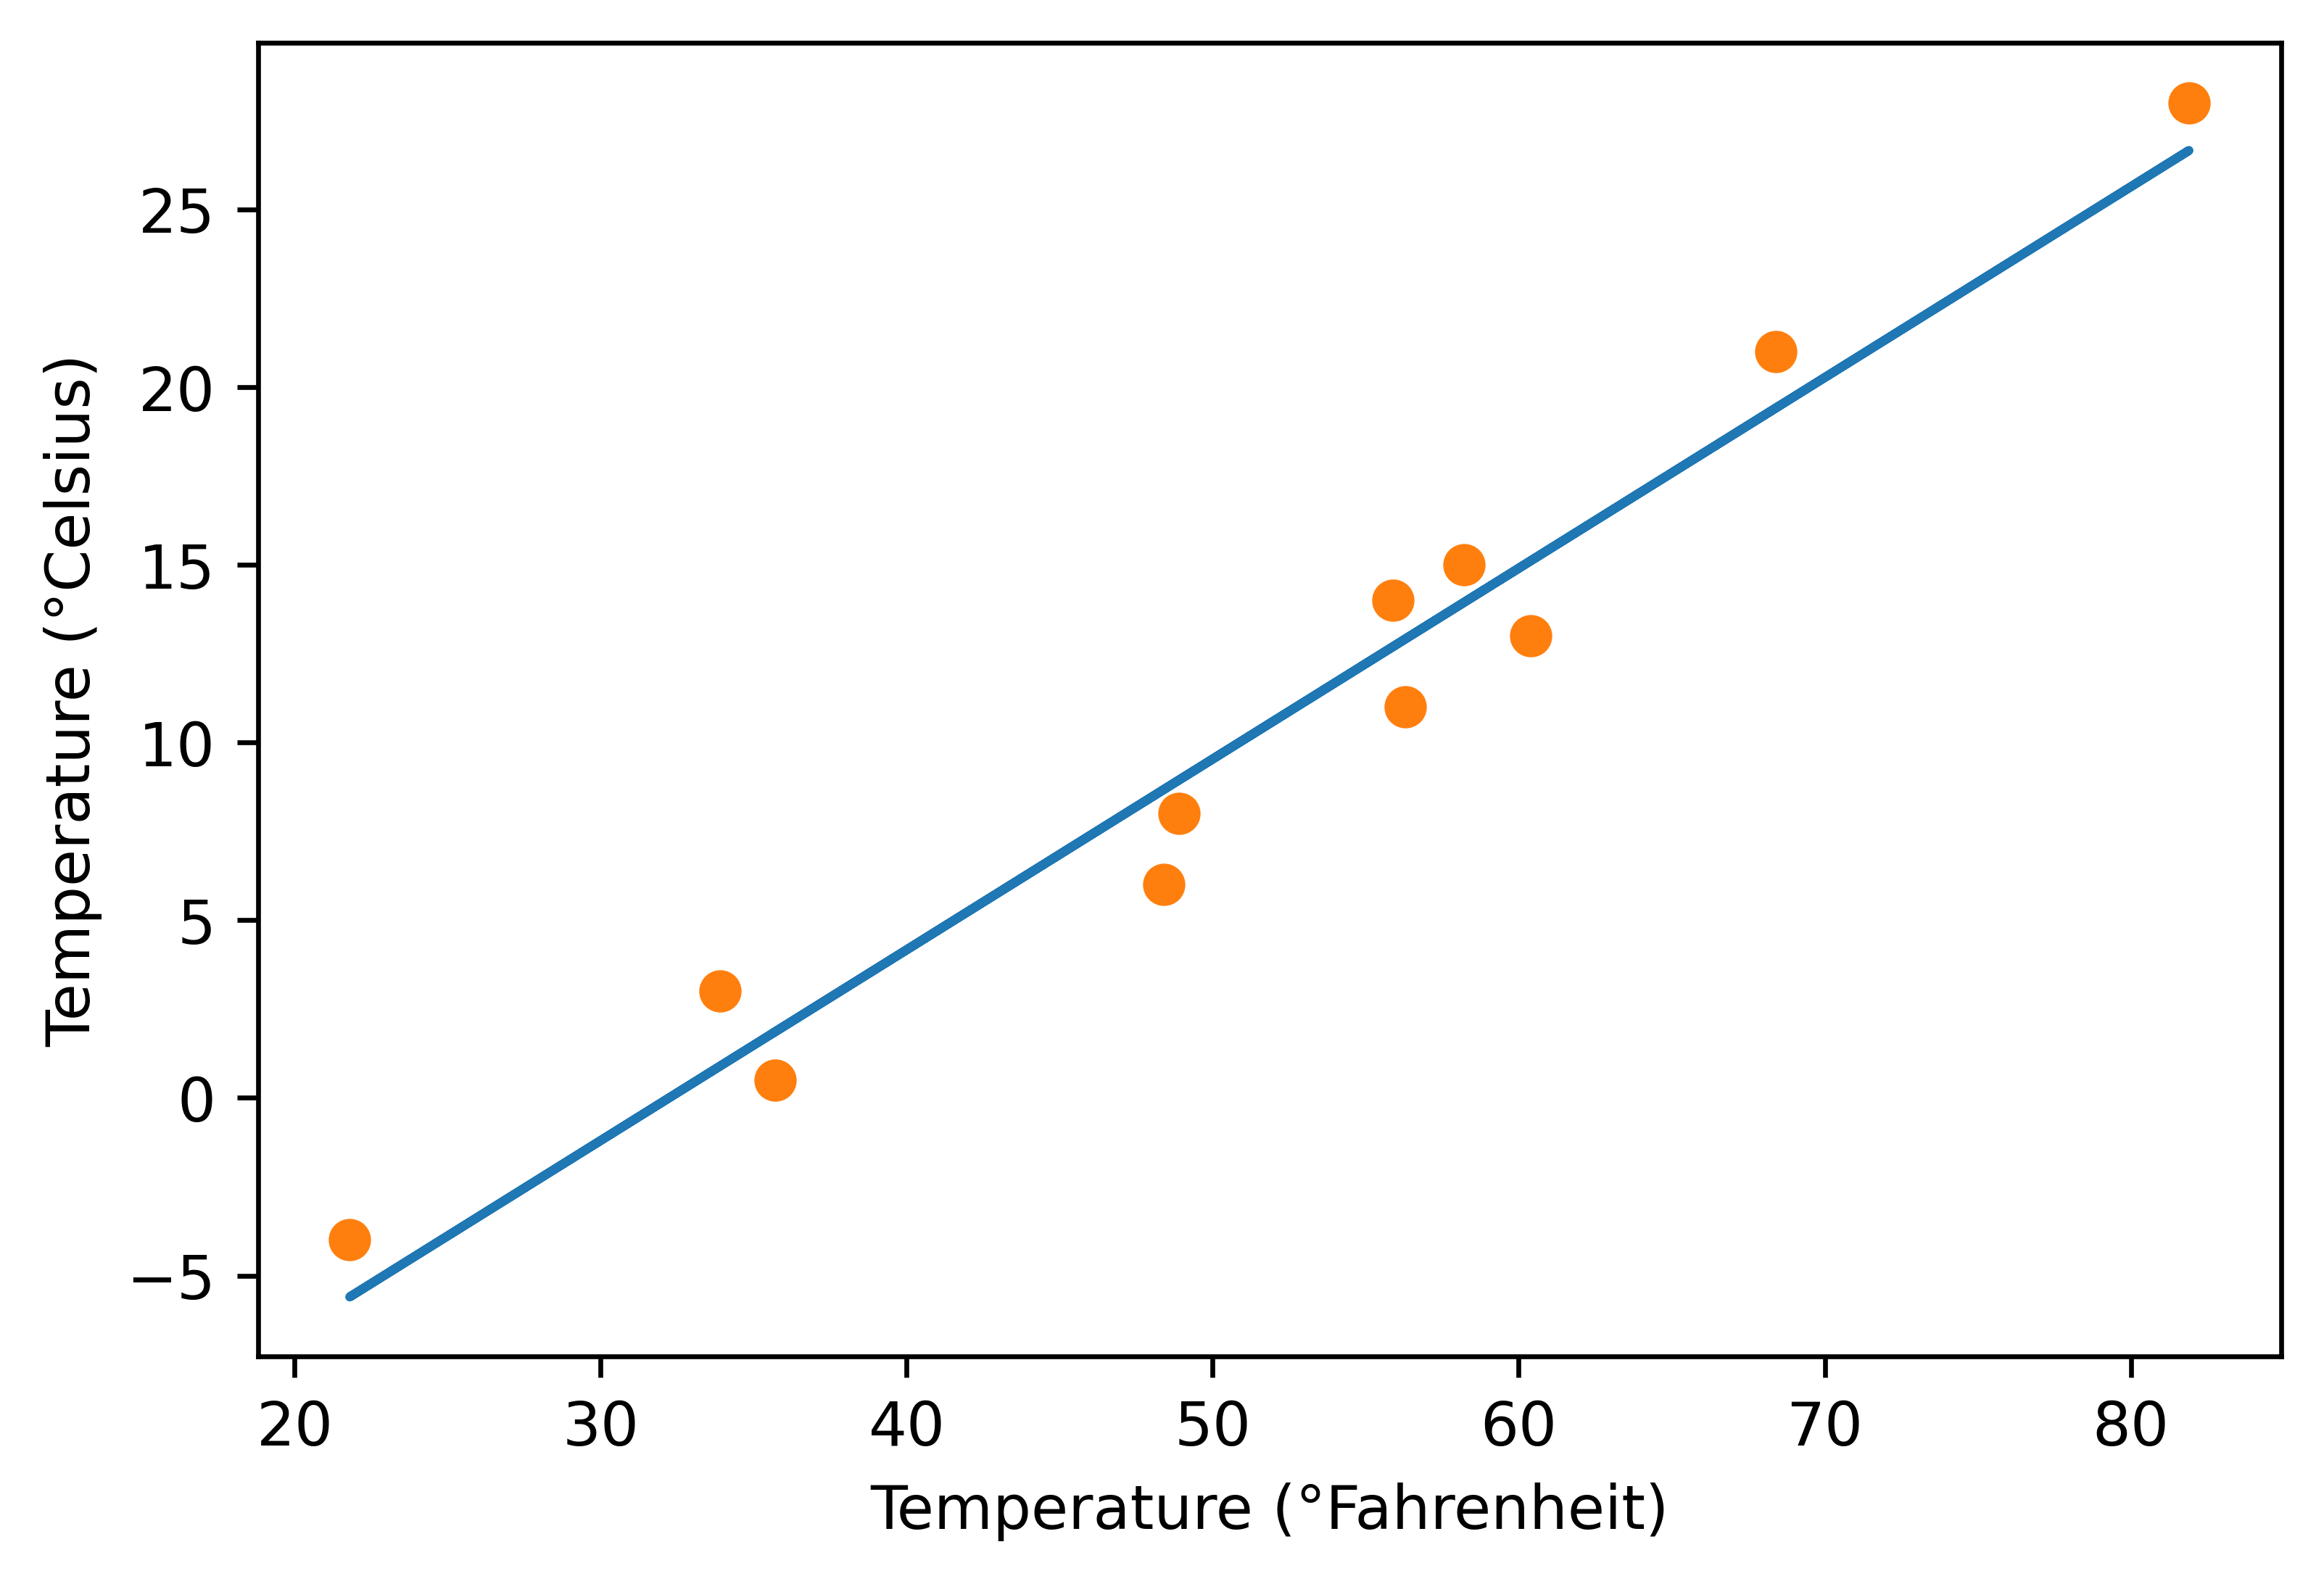

In [12]:
%matplotlib inline
from matplotlib import pyplot as plt

t_p = model_lin(t_un, *params)  

fig = plt.figure(dpi=600)
plt.xlabel("Temperature (°Fahrenheit)")
plt.ylabel("Temperature (°Celsius)")
plt.plot(t_u.numpy(), t_p.detach().numpy()) 
plt.plot(t_u.numpy(), t_c.numpy(), 'o')